![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [ ]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

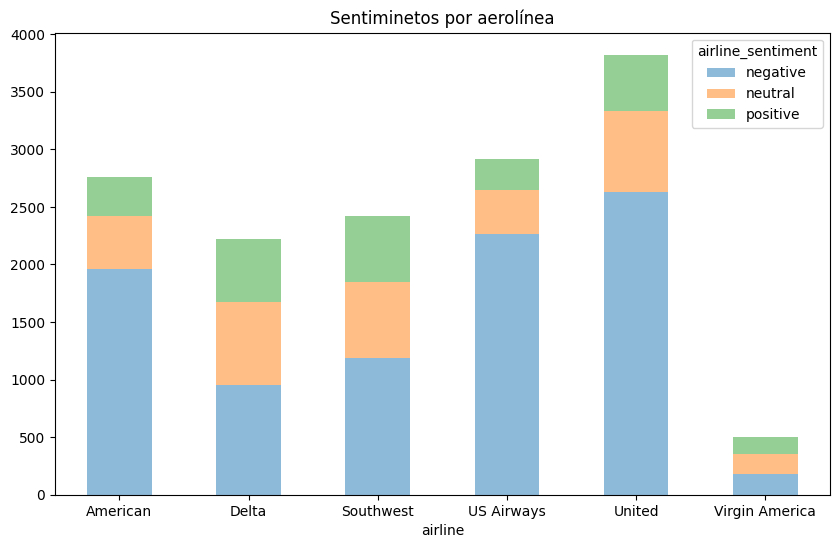

In [ ]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score


In [ ]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
#CountVectorizer en minuscula
vect_A = CountVectorizer(lowercase=True)
X_dtm_A_train = vect_A.fit_transform(X_train)
X_dtm_A_test = vect_A.transform(X_test)

In [ ]:
X_dtm_A_train.shape

(9808, 12056)

In [ ]:
#modelo
model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_dtm_A_train,y_train)
#Predicciones en test
#se calculan las predicciones estas saldran con el encoded
y_pred = model_1.predict(X_dtm_A_test)
y_pred2 = model_1.predict(X_dtm_A_train)

#accuracy
accuracy_m1_test = accuracy_score(y_test, y_pred)
accuracy_m1_train = accuracy_score(y_train, y_pred2)

print('Accuracy test:',accuracy_m1_test)
print('Accuracy train:',accuracy_m1_train)



Accuracy test: 0.7711092715231788
Accuracy train: 0.9979608482871125


**Evaluación resultado:**  al hacer CountVectorizer(lowercase=True) con conversión de palabras a minusculas, se presenta un desempeño del accuracy en un 0.77. Se observa un alto accuracy en train comparado con test, lo que sugiere un alto sobreajuste seguramente por la gran cantidad de variables que se desprenden del count vectorizer.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
#CountVectorizer en minuscula
vect_A = CountVectorizer(lowercase=True,stop_words='english')
X_dtm_A_train = vect_A.fit_transform(X_train)
X_dtm_A_test = vect_A.transform(X_test)


In [ ]:
X_dtm_A_train.shape

(9808, 11777)

In [ ]:
# Celda 2
#modelo
model_2 = RandomForestClassifier(random_state=42)
model_2.fit(X_dtm_A_train,y_train)
#Predicciones en test
#se calculan las predicciones estas saldran con el encoded
y_pred = model_2.predict(X_dtm_A_test)
y_pred2 = model_2.predict(X_dtm_A_train)

#accuracy
accuracy_m2_test = accuracy_score(y_test, y_pred)
accuracy_m2_train = accuracy_score(y_train, y_pred2)

print('Accuracy test:',accuracy_m2_test)
print('Accuracy train:',accuracy_m2_train)



Accuracy test: 0.761796357615894
Accuracy train: 0.9958197389885808


**Evaluación resultado:** al hacer eliminar las stopwords se espera eliminar palabras que no generan valor al texto, buscando una mejora en el rendimiento del modelo en el desempeño del Accuracy de test, sin embargo, con respecto al CountVectorizer(lowercase=True), al aplicar esta técnica se obtiene un desempeño de 0.76 lo cual no implica una mejora. Así mismo se sigue observando un alto sobre ajuste.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 3
# Importación de librerias
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('punkt')
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas

def split_into_lemmas(text):
    text = text.lower()
    words = word_tokenize(text) #text.split() # Aplicar tokenización de nltk, este realiza la tokenización más simimilar a como lo hace CountVectorizer, que simplemente hacer un split por espacios
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#CountVectorizer en minuscula
vect_A = CountVectorizer(lowercase=True,tokenizer=split_into_lemmas)
X_dtm_A_train = vect_A.fit_transform(X_train)
X_dtm_A_test = vect_A.transform(X_test)

In [ ]:
X_dtm_A_train.shape

(9808, 12060)

In [ ]:
#modelo
model_3 = RandomForestClassifier(random_state=42)
model_3.fit(X_dtm_A_train,y_train)
#Predicciones en test
#se calculan las predicciones estas saldran con el encoded
y_pred = model_3.predict(X_dtm_A_test)
y_pred2 = model_3.predict(X_dtm_A_train)

#accuracy
accuracy_m3_test = accuracy_score(y_test, y_pred)
accuracy_m3_train = accuracy_score(y_train, y_pred2)

print('Accuracy test:',accuracy_m3_test)
print('Accuracy train:',accuracy_m3_train)



Accuracy test: 0.7750413907284768
Accuracy train: 0.9984706362153344


**Evaluación resultado:**  el algoritmo de lematización se vuelve más complejo por hacer uso de diccionario para búsqueda de palabras y realizar un etiquetado por palabra, al normalizar las palabras se busca un mejor desempeño en Accuracy de test a lo cual llegamos a 0.775 mejorando respecto a los anteriores.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
#CountVectorizer en minuscula
vect_A = CountVectorizer(lowercase=True,tokenizer=split_into_lemmas,stop_words='english') # Se cambia analyzer por tokenizer para que pueda aplicar stop words
X_dtm_A_train = vect_A.fit_transform(X_train)
X_dtm_A_test = vect_A.transform(X_test)

In [ ]:
X_dtm_A_train.shape

(9808, 11798)

In [ ]:
#modelo
model_4 = RandomForestClassifier(random_state=42)
model_4.fit(X_dtm_A_train,y_train)
#Predicciones en test
#se calculan las predicciones estas saldran con el encoded
y_pred = model_4.predict(X_dtm_A_test)
y_pred2 = model_4.predict(X_dtm_A_train)

#accuracy
accuracy_m4_test = accuracy_score(y_test, y_pred)
accuracy_m4_train = accuracy_score(y_train, y_pred2)

print('Accuracy test:',accuracy_m4_test)
print('Accuracy train:',accuracy_m4_train)



Accuracy test: 0.777317880794702
Accuracy train: 0.9971451876019576


**Evaluación resultado:**  al combinar tecnicas se espera mejorar el desempeño del Accuracy donde logramos un 0.777 mejor que los anteriores

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

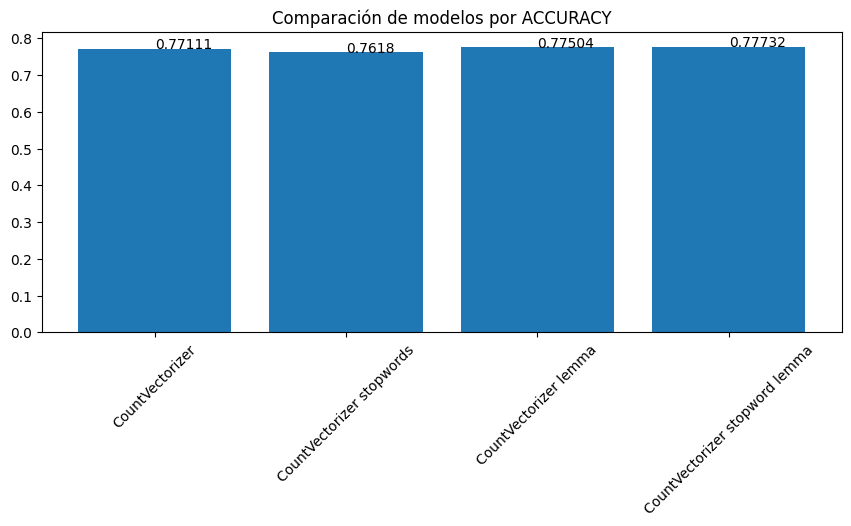

In [ ]:
# Celda 5
fig = plt.figure(figsize=[8,3])
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos por ACCURACY")
#faltan los de filtrado
ejeX = ['CountVectorizer','CountVectorizer stopwords','CountVectorizer lemma','CountVectorizer stopword lemma']
ejeY = [accuracy_m1_test,accuracy_m2_test,accuracy_m3_test,accuracy_m4_test]
ejeY = [round(v,5) for v in ejeY]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.xticks(rotation = 45)
plt.show()

**Evaluación resultado:**  el mejor método es el que combina stopword y lemmatizacion ayudando a tener una mejor prediccion obteniendo un accuracy de 0.77732. Cabe resaltar que este ultimo método nos ayuda a simplificar y entender más el texto que estamos analizando al quitar palabras que nos ayuden y dandole un mejor contexto de una manera  más unificada.